# Задача по решению СЛАУ
## Вариант о)

In [146]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

# CONSTS
N = 100
a = np.float64(10.0)
b = np.float64(1.0/10.0)

Вид системы линейных уравнений  $Ax = b$
где $A$ - матрица системы, $b$ - столбец правой части

In [13]:
# заполнение матрицы А, вектора b

A = np.eye(N, dtype = np.float64)
A = A * a
for i in range(1, N):
    A[i, i - 1] = 1
    if i < 99:
        A[i - 1, i] = 1
    if i < 99:
        A[i - 1, i + 1] = b
        
print(A)

B = np.arange(1, N + 1)
print(B)


[[10.   1.   0.1 ...  0.   0.   0. ]
 [ 1.  10.   1.  ...  0.   0.   0. ]
 [ 0.   1.  10.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... 10.   1.   0.1]
 [ 0.   0.   0.  ...  1.  10.   0. ]
 [ 0.   0.   0.  ...  0.   1.  10. ]]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [31]:
# определение эпсилон машинного для типа float64

i = 0
epsFloat = np.float64(1.0)
while (1 + epsFloat) != 1:
        epsFloat  = epsFloat / 2
        i += 1
print("Машинное эпсилон :", epsFloat)

# матрица абсолютных погрешностей А
deltaA = epsFloat * A

# столбец абсолютных погрешностей b
deltaB = epsFloat * B

epsB = np.linalg.norm(deltaB, ord = 2) / np.linalg.norm(B, ord = 2)
epsA = np.linalg.norm(deltaA, ord = 2) / np.linalg.norm(A, ord = 2)

print("epsilon A:", epsA, "\nepsilon B:", epsB)


Машинное эпсилон : 1.1102230246251565e-16
epsilon A: 1.1102230246251565e-16 epsilon B: 1.1102230246251565e-16


In [ ]:
# программирование метода Гаусса

In [43]:
# нормы матриц
norm1 = np.linalg.norm(A, ord = 1)
norm2 = np.linalg.norm(A, ord = np.inf)
norm3 = np.linalg.norm(A, ord = 2)

print("Нормы матриц:", norm1, norm2, norm3)

# точное решение
U = np.linalg.solve(A, B)
normU = np.linalg.norm(U, ord = 2)

# число обусловленности по норме 3
Mu = norm3 * np.linalg.norm(np.linalg.inv(A), ord = 2)
print("Число обусловленности матрицы А:", Mu)

# проверка условий теоремы
print( (Mu * epsA < 1) )

# вычисление абсолютной погрешности решения
NormDeltaU = normU * Mu / (1 - Mu * epsA ) * ( epsB + epsA )
print("Оценка нормы полученного точного решения:", NormDeltaU)

# вычисление абсолютной погрешности решения, учитывая, что delta A примерно 0
NormDeltaU = normU * Mu * epsB
print("Оценка нормы полученного точного решения в пренебрежении погрешности delta А:", NormDeltaU)


# print("Точное решение: ")
# for i in range(N):
#     print(U[i], "+-", (NormDeltaU / normU) * U[i] )




Нормы матриц: 12.1 12.1 12.098823914668102
Число обусловленности матрицы А: 1.4935358394602174
True
Оценка нормы полученного точного решения: 1.6037018899922626e-14
Оценка нормы полученного точного решения в пренебрежении погрешности delta А: 8.018509449961311e-15
Точное решение: 
0.08114061881585005 +- 2.6908791247993093e-17
0.16393716688650095 +- 5.436674092353045e-17
0.24656644954998494 +- 8.176922010857672e-17
0.329212627691554 +- 1.0917730236763774e-16
0.4118570992209516 +- 1.3658481866021569e-16
0.4945017431352376 +- 1.6399239212106577e-16
0.5771463696369267 +- 1.913999598073489e-16
0.6597909978974621 +- 2.1880752807692102e-16
0.7424356259803365 +- 2.4621509628757515e-16
0.8250802540811565 +- 2.7362266450418057e-16
0.9077248821801637 +- 3.0103023272018482e-16
0.9903695102793542 +- 3.2843780093624987e-16
1.0730141383785259 +- 3.558453691523087e-16
1.1556587664776998 +- 3.8325293736836823e-16
1.238303394576873 +- 4.1066050558442756e-16
1.3209480226760466 +- 4.38068073800487e-16
1.4

In [158]:

# функция вычисления последовательного приближения
# fx = Rx + B
def approx (a, R, B, f):
    curr = np.zeros(len(a), dtype = np.float64)
    curr = a.copy()
    for i in range(len(curr)):
        if R[i,i] != 0:
            print ("Error in R matrix!\n")
            return a
        tmp = R.dot(curr)
        curr[i] = (B[i] + tmp[i]) / f[i]
    return curr

# функция вычисления k -го последовательного приближения
def approx_k (a, R, B, f, k):
    b = a.copy()
    for i in range(k):
        b = approx(b, R, B, f)
    return b 

# вычисление невязки по норме k
# r = f - Ax
def discrep (x, A, B, k):
    r = np.zeros(len(x), dtype = np.float64)
    r = B - A.dot(x)
    norm = np.linalg.norm(r, ord = k)
    return norm

# вычисление нормы (K) погрешности n-го приближения относительно точного решения
def EpsSolve (B, eps0, n, k):
    normB = np.linalg.norm(B, ord = k)
    normEps = np.linalg.norm(eps0, ord = k)
    norm = np.float64((normB ** n) / (1 - normB) * normEps )
    return np.abs(norm)

#вычисление нормы (K) погрешности n-го приближения относительно n-1 приближения
def EpsSubs (Xn, Xn1, k):
    Xn1 = Xn1 - Xn
    return np.linalg.norm(Xn1, ord = k)



In [143]:
R = (-1.0) * (A - a * np.eye(N, dtype = np.float64))
Temp = np.linalg.inv(np.tril(A, k = 0)).dot((A - np.tril(A, k = 0)))

# вычисление приближенного решения с разными критериями останова
x = np.zeros(len(B), dtype = np.float64)
f = np.full((len(B), 1), a, dtype = np.float64)

# по невязке, норма 3
counter = 0
epsilon = 1
while ((discrep(x, A, B, 2)/ np.linalg.norm(x, ord = 2)) < epsilon or counter == 0):
     epsilon = (discrep(x, A, B, 2)/ np.linalg.norm(x, ord = 2))
     x = approx (x, R, B, f)
     counter += 1

print ("Разница между приближенным и точным решением (по норме 3): ", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

# по относительной погрешности, норма 3
x = np.zeros(len(B), dtype = np.float64)
counter = 0
eps0 = np.zeros(len(B), dtype = np.float64)
epsilon = 1
while ( epsilon > epsFloat or counter == 0):
     if (counter == 0):
          eps0 = approx (x, R, B, f) - x
     x = approx (x, R, B, f)
     counter += 1
     epsilon = EpsSolve(Temp, eps0, counter, 2) / np.linalg.norm(x, ord = 2)
     

print ("Разница между приближенным и точным решением (по норме 3): ", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

# по погрешности соседних приближений, норма 3
x = np.zeros(len(B), dtype = np.float64)
counter = 0
epsilon = 1
while ( epsilon >= epsFloat or counter == 0):
     epsilon = EpsSubs(approx(x, R, B, f), x, 2) / np.linalg.norm(x, ord = 2)
     x = approx (x, R, B, f)
     counter += 1
     
print ("Разница между приближенным и точным решением (по норме 3): ", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

Разница между приближенным и точным решением (по норме 3):  6.025453557005701e-15 достигнута за  19  итераций
Разница между приближенным и точным решением (по норме 3):  6.136367973050629e-15 достигнута за  17  итераций
Разница между приближенным и точным решением (по норме 3):  6.025709257468674e-15 достигнута за  18  итераций


/var/folders/pb/wl7yj2m54rb6zgfpjbwpgjqw0000gn/T/ipykernel_1117/3278908506.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  while ((discrep(x, A, B, 2)/ np.linalg.norm(x, ord = 2)) < epsilon or counter == 0):
/var/folders/pb/wl7yj2m54rb6zgfpjbwpgjqw0000gn/T/ipykernel_1117/3278908506.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = (discrep(x, A, B, 2)/ np.linalg.norm(x, ord = 2))
/var/folders/pb/wl7yj2m54rb6zgfpjbwpgjqw0000gn/T/ipykernel_1117/3278908506.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = EpsSubs(approx(x, R, B, f), x, 2) / np.linalg.norm(x, ord = 2)


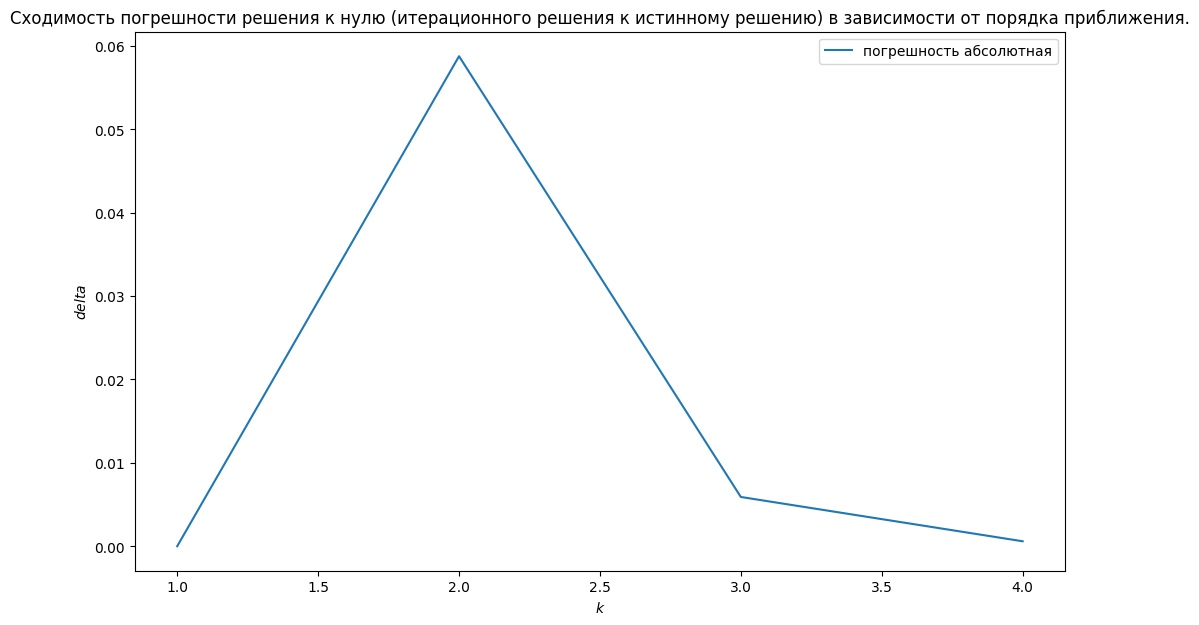

In [171]:
k = np.arange(1, 5)
x = np.zeros(N, dtype = np.float64)
x = approx_k(x, R, B, f, k[0])

E1 = np.zeros(len(k))
E2 = np.zeros(len(k))
E3 = np.zeros(len(k))

for i in range(len(k)):
    E1[i] = discrep(x, A, B, 2)
    x1 = approx(x, R, B, f)
    if i == 0:
        eps0 = x1 - x
    if (i > 0):
        E2[i] = EpsSolve(Temp, eps0, k[i], 2)
        E3[i] = EpsSubs(x1, x, 2)
    x = x1

plt.figure(figsize=[12,7])
plt.plot(k, E1, '-', label = "невязка")
plt.plot(k, E2, '-', label = "погрешность абсолютная")
plt.plot(k, E3, '-', label = "погрешность соседних")

plt.xlabel("$k$")
plt.ylabel("$delta$")
plt.title("Сходимость погрешности решения к нулю (итерационного решения к истинному решению) в зависимости от порядка приближения.")

plt.legend()
plt.show()



